#Redução de Dimenssionalidade

In [5]:
# Bibliotecas
import matplotlib.pyplot as plt
from google.colab import drive
import numpy as np
import scipy.datasets

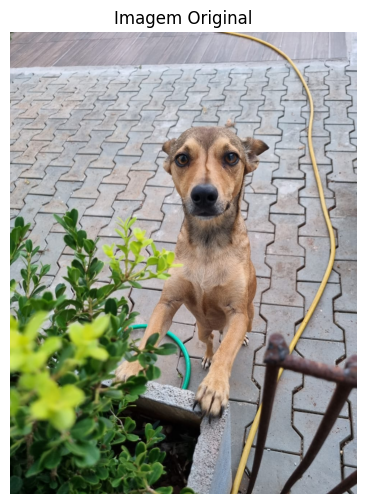

In [18]:
# Carregando Imagem
caminho_imagem = '/content/drive/MyDrive/Colab_Notebooks/Projetos_Machine_Learning_DIO/petsFamilia/17.jpg'
imagem_carregada = plt.imread(caminho_imagem)
fig, ax = plt.subplots(figsize=(8, 6)) # (Opcional) Ajusta o tamanho da exibição

# Exibe a imagem que foi carregada
ax.imshow(imagem_carregada)

#Configurações
ax.set_title('Imagem Original')
ax.axis('off')  # Remove os eixos x e y para uma visualização limpa

# Mostra a imagem na tela
plt.show()


## Declaração de funções


In [34]:
def rgb_para_cinza(imagem_rgb):

    # A imagem carregada por matplotlib já vem com valores normalizados entre 0 e 1.
    # Usando a formula da luminosidade padrão.
    # Grayscale = 0.299 * R + 0.587 * G + 0.114 * B
    pesos = np.array([0.299, 0.587, 0.114])

    # O produto de ponto (dot product) aplica a fórmula acima de forma eficiente
    # para todos os pixels de uma vez, sem a necessidade de um laço 'for'.
    imagem_cinza = np.dot(imagem_rgb[...,:3], pesos)

    return imagem_cinza

def cinza_para_binaria(imagem_cinza, limiar=0.5):

    # Se a imagem em cinza tem valores de 0 a 1, um bom limiar é 0.5.

    # A comparação vetorial do NumPy cria um array booleano (True/False).
    # Onde o pixel > limiar, o valor é True, caso contrário, False.
    imagem_binaria = imagem_cinza > limiar

    # Convertemos o array booleano para inteiros (True vira 1, False vira 0).
    return imagem_binaria.astype(int)

# Bloco de Execução das reduções

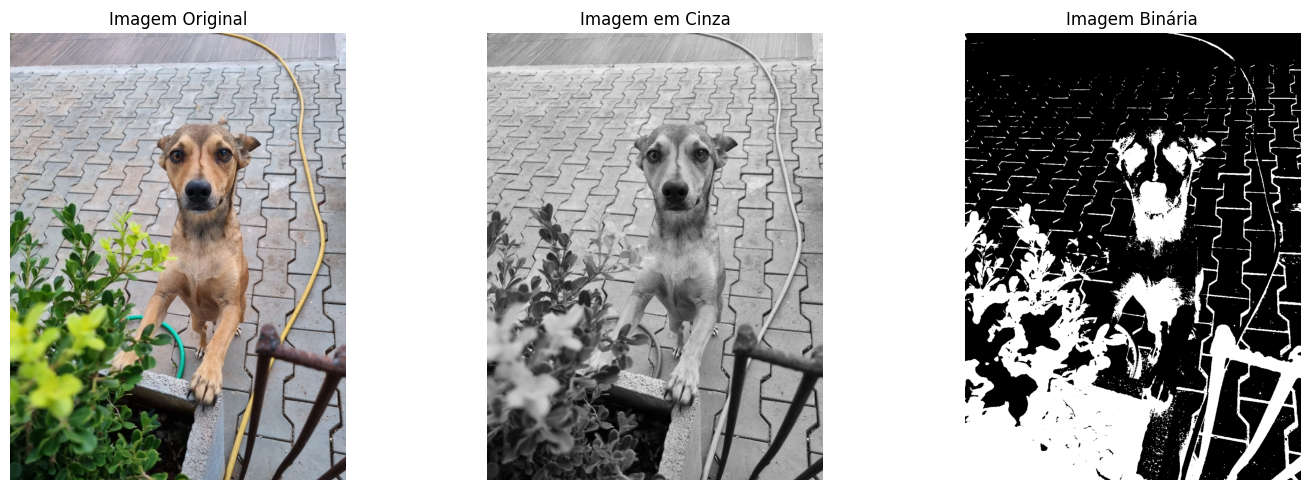

In [41]:
try:
    # Carrega a imagem
    imagem_lida = plt.imread(caminho_imagem)

    # NORMALIZAÇÃO
    # Garante que a imagem esteja na escala de 0.0 a 1.0
    imagem_original = imagem_lida.astype(float) / 255.0

    # Se a imagem tiver um canal alfa (transparência), deve ser removido.
    if imagem_original.shape[2] == 4:
        imagem_original = imagem_original[..., :3]

    # Realizar as conversões
    imagem_em_cinza = rgb_para_cinza(imagem_original)
    imagem_binaria = cinza_para_binaria(imagem_em_cinza, limiar=0.5)

    # Exibir os resultados
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Imagem Original
    axes[0].imshow(imagem_original)
    axes[0].set_title('Imagem Original')
    axes[0].axis('off')

    # Imagem em Tons de Cinza
    axes[1].imshow(imagem_em_cinza, cmap='gray')
    axes[1].set_title('Imagem em Cinza')
    axes[1].axis('off')

    # Imagem Binária
    axes[2].imshow(imagem_binaria, cmap='binary')
    axes[2].set_title('Imagem Binária')
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print(f"Erro: O arquivo '{caminho_imagem}' não foi encontrado.")
